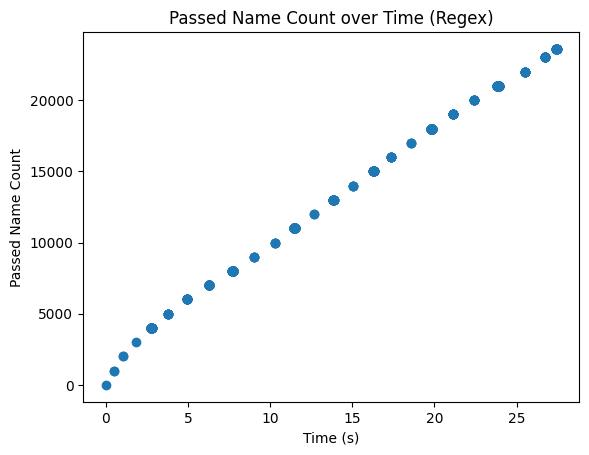

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

regex_df = pd.read_csv('timeDataRegex.csv')
regex_df.head()
plt.scatter(x=regex_df['time'],y=regex_df['count'])
plt.title('Passed Name Count over Time (Regex)')
plt.xlabel('Time (s)')
plt.ylabel('Passed Name Count')
plt.show()

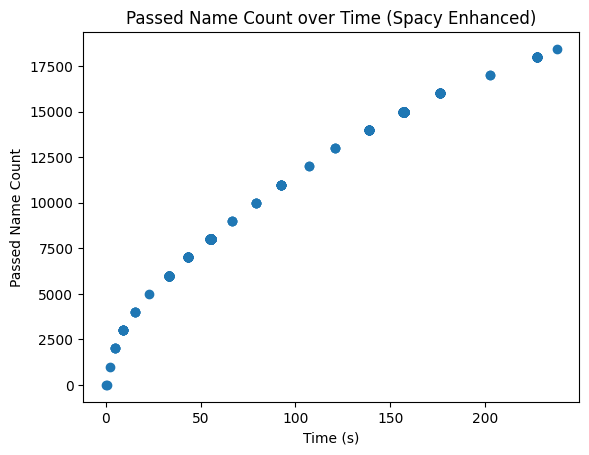

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('timeDataSpacyEnhanced.csv')
df.head()
plt.scatter(x=df['time'],y=df['count'])
plt.title('Passed Name Count over Time (Spacy Enhanced)')
plt.xlabel('Time (s)')
plt.ylabel('Passed Name Count')
plt.show()

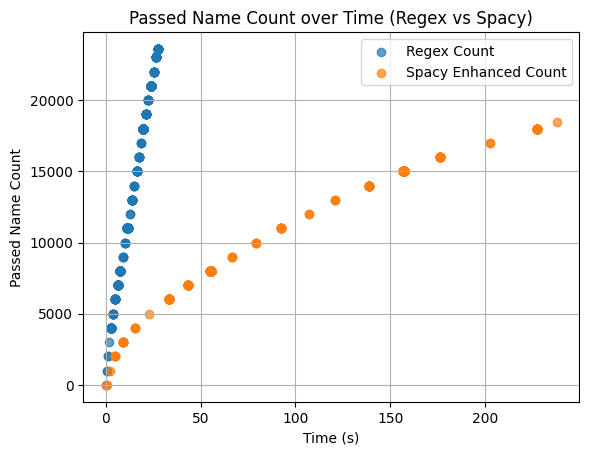

In [19]:
import pandas as pd

# Load and rename
regex_df = pd.read_csv('timeDataRegex.csv').rename(columns={'count': 'regex_count'})
spacy_df = pd.read_csv('timeDataSpacyEnhanced.csv').rename(columns={'count': 'spacy_count'})

# Merge on 'time' column, allow NaNs for non-matching entries
combined_df = pd.merge(regex_df, spacy_df, on='time', how='outer')  # or 'inner' if you only want common times
combined_df = combined_df.sort_values('time')



# plt.figure(figsize=(10, 6))
plt.scatter(combined_df['time'], combined_df['regex_count'], label='Regex Count', alpha=0.7)
plt.scatter(combined_df['time'], combined_df['spacy_count'], label='Spacy Enhanced Count', alpha=0.7)

# Labels and legend
plt.title('Passed Name Count over Time (Regex vs Spacy)')
plt.xlabel('Time (s)')
plt.ylabel('Passed Name Count')
plt.legend()
plt.grid(True)
plt.show()

combined_df.head(100)
combined_df.to_csv('test.csv')

In [26]:
import pandas as pd
import plotly.express as px

# Load and rename
regex_df = pd.read_csv('timeDataRegex.csv').rename(columns={'count': 'regex_count'})
spacy_df = pd.read_csv('timeDataSpacyEnhanced.csv').rename(columns={'count': 'spacy_count'})

# Keep only the first occurrence of each unique count
regex_df = regex_df.drop_duplicates(subset='regex_count', keep='first')
spacy_df = spacy_df.drop_duplicates(subset='spacy_count', keep='first')

# Merge and sort
combined_df = pd.merge(regex_df, spacy_df, on='time', how='outer')
combined_df = combined_df.sort_values('time')

# Convert time to minutes
combined_df['time_minutes'] = combined_df['time'] / 60

# Melt to long format
long_df = combined_df.melt(
    id_vars='time_minutes',
    value_vars=['regex_count', 'spacy_count'],
    var_name='Method',
    value_name='Passed Name Count'
)

# Plot
fig = px.scatter(
    long_df,
    x='time_minutes',
    y='Passed Name Count',
    color='Method',
    hover_data={'time_minutes': True, 'Passed Name Count': True, 'Method': False}
)

fig.update_layout(
    title='Passed Name Count over Time (Regex vs Spacy)',
    xaxis_title='Time (minutes)',
    yaxis_title='Passed Name Count',
    template='plotly_white'
)

fig.show()
fig.write_html('countVsTime.html')

